In [7]:
import sys 
sys.path.append('../fsp')
import stochCalc
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_5717/1500358686.py:10: RuntimeWarning: invalid value encountered in sqrt
  return sigma * np.sqrt(x)
/tmp/ipykernel_5717/1500358686.py:25: RuntimeWarning: overflow encountered in exp
  return (np.exp(-x)*(alpha- 0.5 * sigma**2)-beta)
/tmp/ipykernel_5717/1500358686.py:27: RuntimeWarning: overflow encountered in exp
  return np.exp(-0.5 * x) * sigma
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The regular array was filled in the following amounts:  [80, 97, 100]


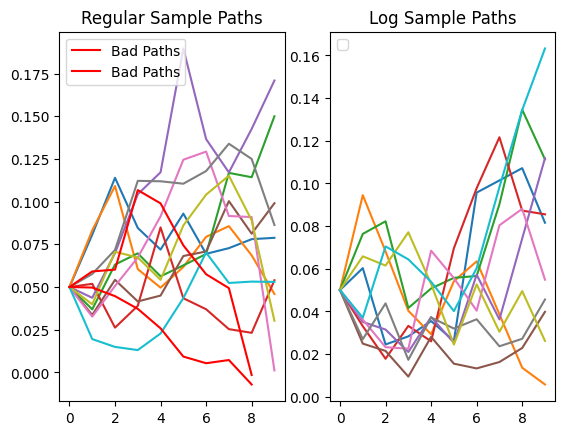

In [8]:
# 1B: 
r = 0.05
beta = 1
alpha = 0.10 * beta
sigma = 0.5

def BETA(x):
    return alpha - beta * x
def GAMMA(x):
    return sigma * np.sqrt(x)

regular = stochCalc.SDE_Efficient(X0=r, lambda_t=0.01, N=10, M=100)
attempts = regular.walk(Beta=BETA, Gamma=GAMMA, replace0=True)
print("The regular array was filled in the following amounts: ", attempts)
fig, axs = plt.subplots(1,2)

axs[0].plot(regular.X.T[:,:10])
axs[0].plot(regular.BadPaths.T[:,:2], 'r', label='Bad Paths')
axs[0].set_title("Regular Sample Paths")
axs[0].legend()
regular_means = (np.mean(regular.X.T, axis=1))
regular_vars = (np.std(regular.X.T, axis=1))

def BETA_LOG(x):
    return (np.exp(-x)*(alpha- 0.5 * sigma**2)-beta)
def GAMMA_LOG(x):
    return np.exp(-0.5 * x) * sigma

logs = stochCalc.SDE_Efficient(X0=np.log(r), lambda_t=0.01, N=10, M=100)
attempts = logs.walk(Beta=BETA_LOG, Gamma=GAMMA_LOG, replace0=True)
axs[1].plot(np.exp(logs.X.T[:,:10]))
axs[1].set_title("Log Sample Paths")
axs[1].legend()
logs_mean = (np.mean(np.exp(logs.X.T), axis=1))
logs_vars = (np.std(np.exp(logs.X.T), axis=1))

plt.show()

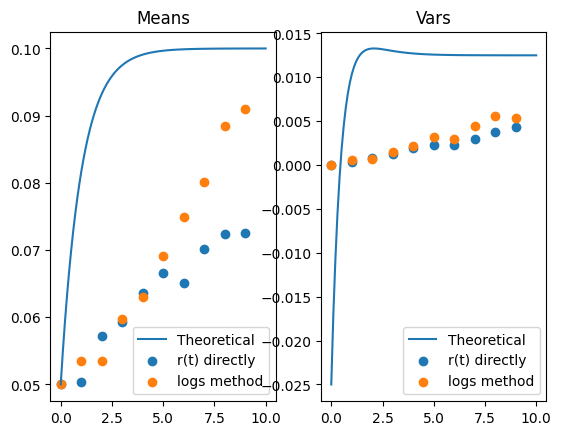

In [9]:
def rt_mean(x):
    return np.exp(-beta * x)*r + (alpha/beta) * (1-np.exp(-beta * x))
def rt_var(x):
    return ((sigma**2) / beta) * r * (np.exp(-beta * x) - np.exp(-2 * beta * x)) + ((alpha * sigma**2)/2 * beta**2) * (1-2*np.exp(-2*beta*x) - np.exp(-2*beta*x))

x_vals = np.linspace(0,10,100)

fig, axs = plt.subplots(1,2)
axs[0].plot(x_vals, rt_mean(x_vals), label="Theoretical")
axs[0].scatter(range(0,len(regular_means)), regular_means, label="r(t) directly")
axs[0].scatter(range(0,len(logs_mean)), logs_mean, label="logs method")

axs[0].set_title("Means")
axs[0].legend()


axs[1].plot(x_vals, rt_var(x_vals), label="Theoretical")
axs[1].scatter(range(0,len(regular_vars)), regular_vars**2, label="r(t) directly")
axs[1].scatter(range(0,len(logs_vars)), logs_vars**2, label="logs method")

axs[1].set_title("Vars")
axs[1].legend()